In [1]:
import torch 
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import DataLoader
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd 
import os
import plotly 
import plotly.graph_objs as go
import plotly.express as px
from plotly.subplots import make_subplots
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [2]:
sensor_names = ["Accelerometer", "Strain", "Clock"]

# datapath = os.path.join(".", "data", "4TPIACME")
datapath = os.path.join(".", "data", "YaoBox")

files = os.listdir(datapath)
files = [f for f in files if f.endswith(".csv")]
files = [f for f in files if "Accelerometer" in f or "Strain" in f or "Clock" in f]

df = {}
keys = []

for f in files:
    for s in sensor_names:
        if s in f:
            df[f.split(".")[0]] = pd.read_csv(os.path.join(datapath, f))
            keys.append(f.split(".")[0])
            print(f)

def preprocessing(df): 
    temp = df.copy()
    temp['Time'] = pd.to_timedelta(temp['Time'])
    temp['Time'] = temp['Time'].dt.total_seconds()
    temp['Time'] = temp['Time'] - temp['Time'][0]
    t = temp['Time'].values
    value = temp['Value'].values
    scaler = MinMaxScaler()
    value = scaler.fit_transform(value.reshape(-1, 1)).flatten()
    return t, value

Box1Accelerometer2GRaw0.csv
Box1Accelerometer2GRaw1.csv
Box1Accelerometer2GRaw2.csv
Box1Accelerometer50GRaw0.csv
Box1Accelerometer50GRaw1.csv
Box1ClockPeripheral.csv
Box2ClockPeripheral.csv
Box2StrainRaw0.csv
Box2StrainRaw1.csv
Box3Clock.csv


In [3]:
t10, b10 = preprocessing(df[keys[0]])
t11, b11 = preprocessing(df[keys[1]])
t12, b12 = preprocessing(df[keys[2]])
t13, b13 = preprocessing(df[keys[3]])
t14, b14 = preprocessing(df[keys[4]])
t15, b15 = preprocessing(df[keys[7]])
t16, b16 = preprocessing(df[keys[8]])

# t17, b17 = preprocessing(df[keys[5]])
# t18, b18 = preprocessing(df[keys[6]])
# t19, b19 = preprocessing(df[keys[9]])

# print(len(t10), len(t11), len(t12), len(t13), len(t14))


In [4]:
fig = make_subplots(rows=7, cols=1)

fig.add_trace(go.Scatter(x=t10, y=b10, mode='lines', name='A1', showlegend=False), row=1, col=1)
fig.add_trace(go.Scatter(x=t11, y=b11, mode='lines', name='A2', showlegend=False), row=2, col=1)
fig.add_trace(go.Scatter(x=t12, y=b12, mode='lines', name='A3', showlegend=False), row=3, col=1)
fig.add_trace(go.Scatter(x=t13, y=b13, mode='lines', name='A4', showlegend=False), row=4, col=1)
fig.add_trace(go.Scatter(x=t14, y=b14, mode='lines', name='A5', showlegend=False), row=5, col=1)
fig.add_trace(go.Scatter(x=t15, y=b15, mode='lines', name='A6', showlegend=False), row=6, col=1)
fig.add_trace(go.Scatter(x=t16, y=b16, mode='lines', name='A7', showlegend=False), row=7, col=1)

# fig.add_trace(go.Scatter(x=t17, y=b17, mode='lines', name='A8', showlegend=False), row=8, col=1)
# fig.add_trace(go.Scatter(x=t18, y=b18, mode='lines', name='A9', showlegend=False), row=9, col=1)
# fig.add_trace(go.Scatter(x=t19, y=b19, mode='lines', name='A10', showlegend=False), row=10, col=1)

annotations = [
    dict(xref='x1', yref='y1', x=max(t10), y=max(b10), text=keys[0], showarrow=False),
    dict(xref='x1', yref='y1', x=max(t10), y=.95*max(b10), text=f"Samples: {len(t10)}", showarrow=False),
    dict(xref='x2', yref='y2', x=max(t11), y=max(b11), text=keys[1], showarrow=False),
    dict(xref='x2', yref='y2', x=max(t11), y=.95*max(b11), text=f"Samples: {len(t11)}", showarrow=False),
    dict(xref='x3', yref='y3', x=max(t12), y=max(b12), text=keys[2], showarrow=False),
    dict(xref='x3', yref='y3', x=max(t12), y=.95*max(b12), text=f"Samples: {len(t12)}", showarrow=False),
    dict(xref='x4', yref='y4', x=max(t13), y=max(b13), text=keys[3], showarrow=False),
    dict(xref='x4', yref='y4', x=max(t13), y=.95*max(b13), text=f"Samples: {len(t13)}", showarrow=False),
    dict(xref='x5', yref='y5', x=max(t14), y=max(b14), text=keys[4], showarrow=False),
    dict(xref='x5', yref='y5', x=max(t14), y=.95*max(b14), text=f"Samples: {len(t14)}", showarrow=False),
    dict(xref='x6', yref='y6', x=max(t15), y=max(b15), text=keys[7], showarrow=False),
    dict(xref='x6', yref='y6', x=max(t15), y=.95*max(b15), text=f"Samples: {len(t15)}", showarrow=False),
    dict(xref='x7', yref='y7', x=max(t16), y=max(b16), text=keys[8], showarrow=False),
    dict(xref='x7', yref='y7', x=max(t16), y=.95*max(b16), text=f"Samples: {len(t16)}", showarrow=False),

    # dict(xref='x8', yref='y8', x=max(t17), y=max(b17), text=keys[5], showarrow=False),
    # dict(xref='x8', yref='y8', x=max(t17), y=.95*max(b17), text=f"Samples: {len(t17)}", showarrow=False),
    # dict(xref='x9', yref='y9', x=max(t18), y=max(b18), text=keys[6], showarrow=False),
    # dict(xref='x9', yref='y9', x=max(t18), y=.95*max(b18), text=f"Samples: {len(t18)}", showarrow=False),
    # dict(xref='x10', yref='y10', x=max(t19), y=max(b19), text=keys[9], showarrow=False),
    # dict(xref='x10', yref='y10', x=max(t19), y=.95*max(b19), text=f"Samples: {len(t19)}", showarrow=False),

]

fig.update_layout(height=2000, width=1500, title_text="Sensor Data", annotations=annotations)
# fig.update_layout(height=1000, width=1500, title_text="Sensor Data")
fig.show()


In [28]:
sensor_selected = "StrainRaw1"
key_selected = [k for k in keys if sensor_selected in k][0]
t, b = preprocessing(df[key_selected])

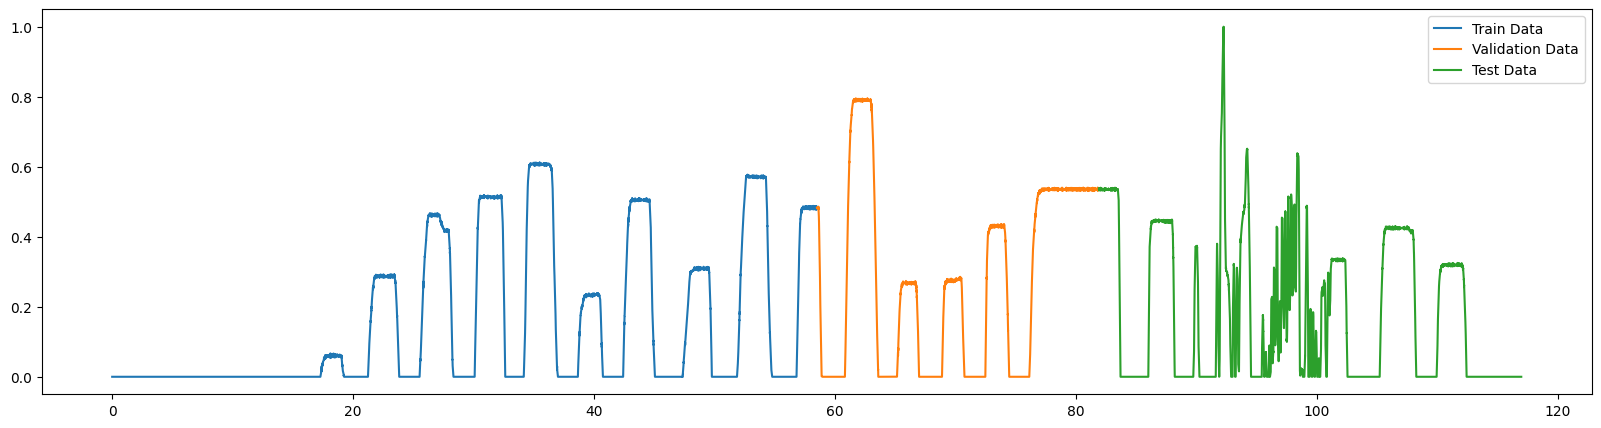

In [29]:
train_size = .5
val_size = .2 
test_size = .3
train_data = b[:int(train_size*len(b))]
val_data = b[int(train_size*len(b)):int((train_size+val_size)*len(b))]
test_data = b[int((train_size+val_size)*len(b)):]

plt.figure(figsize=(20, 5))
# plt.plot(t, b, label="Original Data")
plt.plot(t[:len(train_data)], train_data, label="Train Data")
plt.plot(t[len(train_data):len(train_data)+len(val_data)], val_data, label="Validation Data")
plt.plot(t[len(train_data)+len(val_data):], test_data, label="Test Data")
plt.legend()
plt.show()

In [30]:
def create_sequences(data, window_size):
    sequences = []
    for i in range(len(data) - window_size):
        sequences.append(data[i:i+window_size])
    return np.array(sequences)

window_size = 50
train_sequences = create_sequences(train_data, window_size)
val_sequences = create_sequences(val_data, window_size)
test_sequences = create_sequences(test_data, window_size)

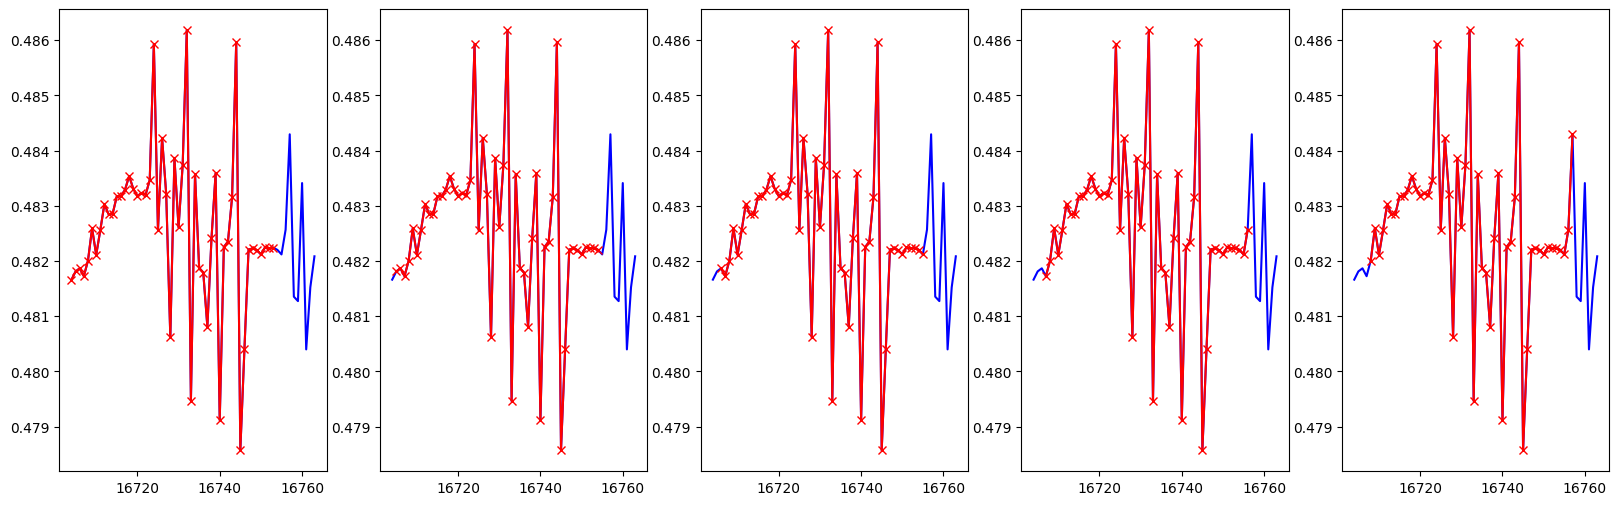

In [32]:
plt.figure(figsize=(20, 6))
step = 5
ind_start = np.random.randint(0, len(train_sequences)-step)
ind_end = ind_start + window_size + 10
for i in range(step): 
    ind_selected = ind_start + i
    plt.subplot(1, 5, i+1)
    plt.plot(np.arange(ind_start, ind_end), b[ind_start:ind_end], 'b-', label="Signal")
    plt.plot(np.arange(ind_selected, ind_selected+window_size), train_sequences[ind_selected], 'rx-', label="Sequence")
plt.show()

In [33]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

trainData = torch.FloatTensor(train_sequences).unsqueeze(-1).to(device)
valData = torch.FloatTensor(val_sequences).unsqueeze(-1).to(device)
testData = torch.FloatTensor(test_sequences).unsqueeze(-1).to(device)

cuda


In [35]:
class Encoder(nn.Module): 
    def __init__(self): 
        super().__init__()
        self.lstm1 = nn.LSTM(
            input_size=1, 
            hidden_size=64, 
            num_layers=1, 
            batch_first=True
        )
        self.lstm2 = nn.LSTM(
            input_size=64, 
            hidden_size=32, 
            num_layers=1, 
            batch_first=True
        )
        self.lstm3 = nn.LSTM(
            input_size=32, 
            hidden_size=16, 
            num_layers=1, 
            batch_first=True
        )
    
    def forward(self, x):
        x, (hidden, cell) = self.lstm1(x)
        x, (hidden, cell) = self.lstm2(x)
        x, (hidden, cell) = self.lstm3(x)
        return x
    
class Decoder(nn.Module): 
    def __init__(self): 
        super().__init__()
        self.lstm1 = nn.LSTM(
            input_size=16, 
            hidden_size=32, 
            num_layers=1, 
            batch_first=True
        )
        self.lstm2 = nn.LSTM(
            input_size=32, 
            hidden_size=64, 
            num_layers=1, 
            batch_first=True
        )
        self.lstm3 = nn.LSTM(
            input_size=64, 
            hidden_size=1, 
            num_layers=1, 
            batch_first=True
        )
        self.fc = nn.Linear(1, 1)
    
    def forward(self, x):
        x, (hidden, cell) = self.lstm1(x)
        x, (hidden, cell) = self.lstm2(x)
        x, (hidden, cell) = self.lstm3(x)
        x = self.fc(x)
        return x

class LSTMAutoEncoder(nn.Module): 
    def __init__(self): 
        super().__init__()
        self.encoder = Encoder()
        self.decoder = Decoder()
    
    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x

Total Parameters: 64654
Epoch 0 Train Loss: 1.2330505847930908 Validation Loss: 1.516393780708313 Accuracy: -51.64%
Epoch 10 Train Loss: 0.8282057046890259 Validation Loss: 1.0734881162643433 Accuracy: -7.35%
Epoch 20 Train Loss: 0.4347638785839081 Validation Loss: 0.5855501294136047 Accuracy: 41.44%
Epoch 30 Train Loss: 0.27711984515190125 Validation Loss: 0.43871548771858215 Accuracy: 56.13%
Epoch 40 Train Loss: 0.25124382972717285 Validation Loss: 0.40755999088287354 Accuracy: 59.24%
Epoch 50 Train Loss: 0.23239049315452576 Validation Loss: 0.3836897015571594 Accuracy: 61.63%
Epoch 60 Train Loss: 0.21606913208961487 Validation Loss: 0.36258915066719055 Accuracy: 63.74%
Epoch 70 Train Loss: 0.2012692093849182 Validation Loss: 0.3431767523288727 Accuracy: 65.68%
Epoch 80 Train Loss: 0.18761897087097168 Validation Loss: 0.32504257559776306 Accuracy: 67.50%
Epoch 90 Train Loss: 0.17495428025722504 Validation Loss: 0.3080137073993683 Accuracy: 69.20%
Epoch 100 Train Loss: 0.1631823629140

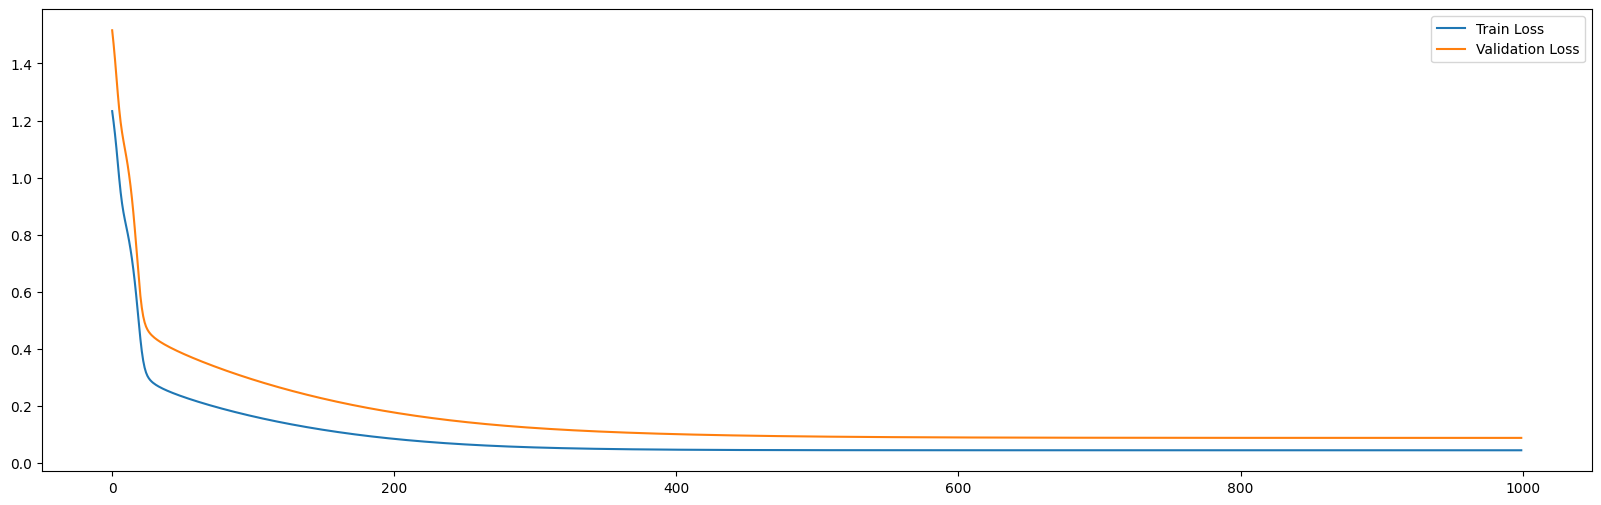

In [45]:
model = LSTMAutoEncoder().to(device)
totalParams = sum(p.numel() for p in model.parameters())
print(f"Total Parameters: {totalParams}")
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

num_epochs = 1000

train_loss = []
val_loss = []
accuracy = []

for i in range(num_epochs): 
    model.train()
    optimizer.zero_grad()
    outputs = model(trainData)
    loss = criterion(outputs, trainData)
    loss.backward()
    optimizer.step()
    train_loss.append(loss.item())

    model.eval()
    with torch.no_grad(): 
        outputs = model(valData)
        loss = criterion(outputs, valData)
        val_loss.append(loss.item())
        accuracy.append(1 - loss.item())
    
    if i % 10 == 0:
        print(f"Epoch {i} Train Loss: {train_loss[-1]} Validation Loss: {val_loss[-1]} Accuracy: {accuracy[-1]*100:.2f}%")

plt.figure(figsize=(20, 6))
plt.plot(train_loss, label="Train Loss")
plt.plot(val_loss, label="Validation Loss")
plt.legend()
plt.show()

#     outputs = model(trainX)
#     loss = criterion(outputs, trainX)
#     loss.backward()
#     optimizer.step()
#     train_loss.append(loss.item())

#     model.eval()
#     with torch.no_grad(): 
#         outputs = model(testX)
#         loss = criterion(outputs, testX)
#         test_loss.append(loss.item())
#         accuracy.append(1 - loss.item())
    
#     if i % 10 == 0:
#         print(f"Epoch {i} Train Loss: {train_loss[-1]} Test Loss: {test_loss[-1]} Accuracy: {accuracy[-1]*100:.2f}%")
    
# plt.figure(figsize=(20, 6))
# plt.plot(train_loss, label="Train Loss")
# plt.plot(test_loss, label="Test Loss")
# plt.legend()
# plt.show()

In [37]:
# # Export the model to ONNX format
# torch.onnx.export(model, trainData, 'model.onnx', export_params=True, input_names=['input'], output_names=['output'])

# # Save the model in PTH format
# torch.save(model.state_dict(), 'model.pth')

In [46]:
predTrain = model(trainData).cpu().detach().numpy()
predVal = model(valData).cpu().detach().numpy()
predTest = model(testData).cpu().detach().numpy()

In [47]:
predTrain.shape, predVal.shape, predTest.shape

((17006, 50, 1), (6772, 50, 1), (10184, 50, 1))

In [48]:
# plt.figure(figsize=(20, 6))
# plt.plot(t, b, label="Original Data")
# plt.plot(t[window_size:window_size+len(predTrain)], predTrain[:, -1, :], label="Train Prediction")
# plt.plot(t[window_size+len(predTrain)+window_size:window_size+len(predTrain)+window_size+len(predVal)], predVal[:, -1, :], label="Validation Prediction")
# plt.plot(t[window_size+len(predTrain)+window_size+len(predVal)+window_size:], predTest[:, -1, :], label="Test Prediction")

fig = make_subplots(rows=1, cols=1)
fig.add_trace(go.Scatter(x=t, y=b, mode='lines', name='Original Data', showlegend=False, line=dict(color='blue')))
fig.add_trace(go.Scatter(x=t[window_size:window_size+len(predTrain)], y=predTrain[:, -1, :].flatten(), showlegend=False), row=1, col=1)
fig.add_trace(go.Scatter(x=t[window_size+len(predTrain)+window_size:window_size+len(predTrain)+window_size+len(predVal)], y=predVal[:, -1, :].flatten(), showlegend=False), row=1, col=1)
fig.add_trace(go.Scatter(x=t[window_size+len(predTrain)+window_size+len(predVal)+window_size:], y=predTest[:, -1, :].flatten(), showlegend=False), row=1, col=1)

fig.update_layout(height=600, width=1800, title_text="Sensor Data")
fig.show()

In [41]:
errorTrain = np.abs(predTrain - trainData.cpu().detach().numpy())
errorVal = np.abs(predVal - valData.cpu().detach().numpy())
errorTest = np.abs(predTest - testData.cpu().detach().numpy())

In [42]:
errorTrainFinal = errorTrain[:, -1, :].flatten()
errorValFinal = errorVal[:, -1, :].flatten()
errorTestFinal = errorTest[:, -1, :].flatten()
errorTrainFinal.shape, errorValFinal.shape, errorTestFinal.shape

((17006,), (6772,), (10184,))

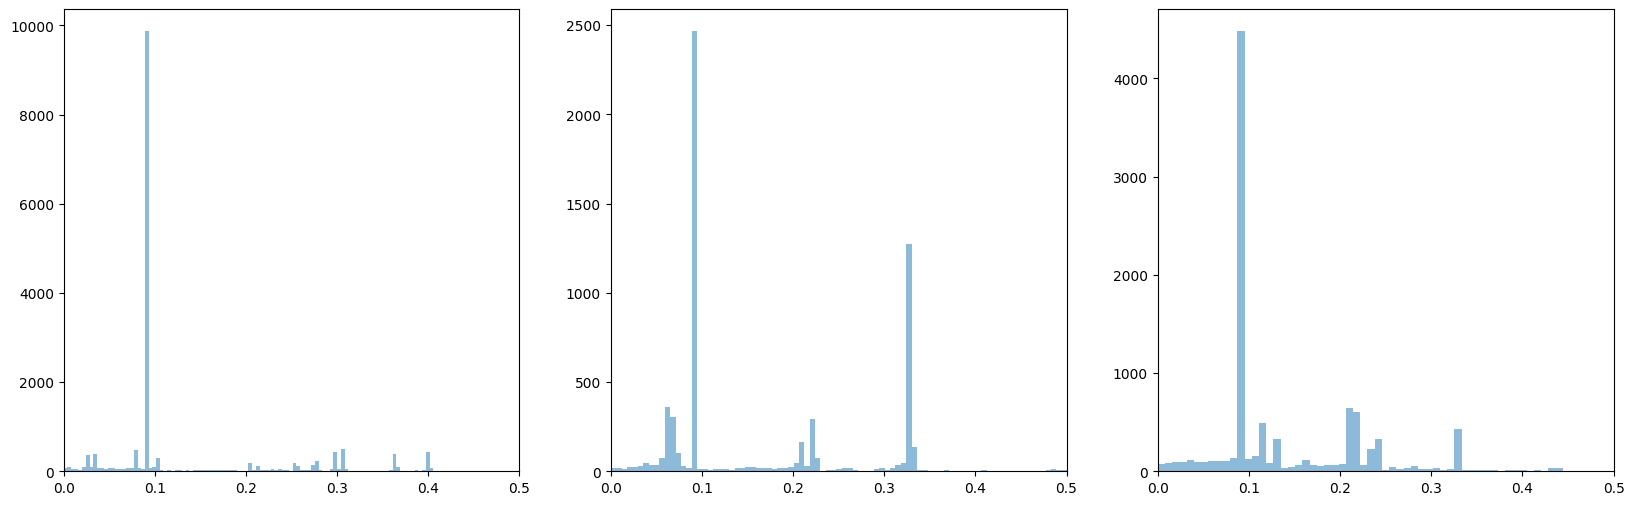

In [43]:
plt.figure(figsize=(20, 6)) 
plt.subplot(131)
plt.hist(errorTrainFinal, bins=100, alpha=0.5, label='Train Error')
plt.xlim([0, 0.5])  # Set the xlim for the first subplot
plt.subplot(132)
plt.hist(errorValFinal, bins=100, alpha=0.5, label='Validation Error')
plt.xlim([0, 0.5])  # Set the xlim for the second subplot
plt.subplot(133)
plt.hist(errorTestFinal, bins=100, alpha=0.5, label='Test Error')
plt.xlim([0, 0.5])  # Set the xlim for the third subplot
plt.show()

In [44]:
threshold = .3
anomaliesTrain = np.where(errorTrainFinal > threshold)[0]
anomaliesVal = np.where(errorValFinal > threshold)[0]
anomaliesTest = np.where(errorTestFinal > threshold)[0]

fig = make_subplots(rows=1, cols=1)
fig.add_trace(go.Scatter(x=t, y=b, mode='lines', name='Original Data', showlegend=False, line=dict(color='blue')))
# fig.add_trace(go.Scatter(x=t[window_size+anomaliesTrain], y=b[window_size+anomaliesTrain], mode='markers', name='Anomalies Train', showlegend=False, marker=dict(color='red', size=5)), row=1, col=1)
# fig.add_trace(go.Scatter(x=t[window_size+len(predTrain)+window_size+anomaliesVal], y=b[window_size+len(predTrain)+window_size+anomaliesVal], mode='markers', name='Anomalies Validation', showlegend=False, marker=dict(color='orange', size=5)), row=1, col=1)
fig.add_trace(go.Scatter(x=t[window_size+len(predTrain)+window_size+len(predVal)+window_size+anomaliesTest], y=b[window_size+len(predTrain)+window_size+len(predVal)+window_size+anomaliesTest], mode='markers', name='Anomalies Test', showlegend=False, marker=dict(color='red', size=5)), row=1, col=1)
fig.add_shape(
    type="rect",
    xref="x",
    yref="y",
    x0=t[window_size+len(predTrain)+window_size+len(predVal)+window_size+anomaliesTest[0]],
    y0=min(b),
    x1=t[window_size+len(predTrain)+window_size+len(predVal)+window_size+anomaliesTest[-1]],
    y1=max(b),
    fillcolor="rgba(255,0,0,0.6)",
    line=dict(color="rgba(255,0,0,0.6)"),
    opacity=0.6,
    layer="below"
)

fig.update_layout(height=500, width=1500)
fig.show()

In [98]:
a = [p.numel() for p in model.parameters() if p.requires_grad]
sum(a)

564366

In [21]:
import torch

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model = LSTMAutoEncoder().to(device)
model.load_state_dict(torch.load("model.pth"))
model.eval()


LSTMAutoEncoder(
  (encoder): Encoder(
    (lstm1): LSTM(1, 256, batch_first=True)
    (lstm2): LSTM(256, 16, batch_first=True)
  )
  (decoder): Decoder(
    (lstm1): LSTM(16, 256, batch_first=True)
    (lstm2): LSTM(256, 1, batch_first=True)
    (fc): Linear(in_features=1, out_features=1, bias=True)
  )
)

In [22]:
torch.onnx.export(
    model,                # model being run
    trainData,          # model input (or a tuple for multiple inputs)
    "model.onnx",         # where to save the model (can be a file or file-like object)
    export_params=True,   # store the trained parameter weights inside the model file
    opset_version=11,     # the ONNX version to export the model to
    do_constant_folding=True,  # whether to execute constant folding for optimization
    input_names=['input'],   # the model's input names
    output_names=['output'], # the model's output names
    dynamic_axes={'input': {0: 'batch_size'},  # variable length axes
                  'output': {0: 'batch_size'}}
)


OutOfMemoryError: CUDA out of memory. Tried to allocate 4.28 GiB. GPU 